# Section 04 - Pandas
## Author: Gustavo Amarante

Pandas is an open source library providing **high-performance, easy-to-use data structures and data analysis tools** for the Python programming language. The main idea behind this library is a **table**, which pandas calls a **`DataFrame`**. Pandas allows you to handle data in a way that is much more intuitive than other softwares, like MATLAB. Think of it as an Excel spreadsheet, which has named lines and columns. For those who used "R" before, pandas is to python as `dplyr` is to "R". Pandas also allows for very **basic data visualization**. 

The development of this library began in 2008 at [AQR Capital Management](https://www.aqr.com/). In 2009 the library was open sourced.

If you are looking for a quick tutorial have a look at the [pandas cookbook](https://pandas.pydata.org/pandas-docs/stable/cookbook.html) or, if want to go deep in the details (and you should), here is the [official documentation](https://pandas.pydata.org/pandas-docs/stable/index.html). Scroll through the index and see what interests you (there is a friendly PDF version which has 2600 pages!!!).

**Obs**: the name "pandas" comes from "**Pan**el **Da**ta **S**tructure", which was the original purpose of the library.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # ignore this line for now

---
# The `Series` Object
You can think of a `Series` as a "named sequence of indexed values".

In [3]:
my_series = pd.Series(index=['John', 'George', 'Paul', 'Ringo'], data=[1940, 1943, 1942, 1940], name='Birth Year')
my_series

John      1940
George    1943
Paul      1942
Ringo     1940
Name: Birth Year, dtype: int64

In [4]:
type(my_series)

pandas.core.series.Series

We can access the values inside of the series by their index with different methods

In [5]:
my_series.loc['Paul']  # here 'loc' means 'location'

1942

In [6]:
my_series.iloc[2]  # 'iloc' allows you to treat the series as a matrix

1942

In [7]:
my_series.iloc[-2]  # ... but with a few different twists

1942

In practice, a pandas `Series` holds a **single variable**. If we want to handle several variables at once, we need a different type of object...

---
# The `DataFrame` Object

Think of a `DataFrame` as a collection of several `Series`.

A `DataFrame` has three ingredients: `index` (observation identifier), `columns` (variable/`Series` identifier) and `data`.

The cell below creates a `DataFrame` with two `Series`, the first one called "Birth Year" and the second one called "Height".

In [8]:
my_df = pd.DataFrame(columns=['Birth Year', 'Height'], 
                     index=['John', 'George', 'Paul', 'Ringo'],
                     data=[[1940, 1.78], 
                           [1943, 1.78], 
                           [1942, 1.76], 
                           [1940, 1.68]])
my_df

,Birth Year,Height
John,1940,1.78
George,1943,1.78
Paul,1942,1.76
Ringo,1940,1.68


In [9]:
type(my_df)

pandas.core.frame.DataFrame

There are other ways to declare a `DataFrame` that might be useful. For example, you can pass a `dict` variable to the `data` atribute, where the keys of the dictionary are the names of the variables.

In [ ]:
data_dict = {'Birth Year': [1940, 1943, 1942, 1940],
             'Height': [1.78, 1.78, 1.76, 1.68]}

index_list = ['John', 'George', 'Paul', 'Ringo']

my_df = pd.DataFrame(data=data_dict, 
                     index=index_list)

my_df

Now that we have our `DataFrame` we can access **variables** (columns/`Series`) using their column name or access the **observation** (line/index) using the `.loc[]` atribute.

In [10]:
my_df['Height']

John      1.78
George    1.78
Paul      1.76
Ringo     1.68
Name: Height, dtype: float64

In [11]:
my_df.loc['Ringo']

Birth Year    1940.00
Height           1.68
Name: Ringo, dtype: float64

A specific value can be acessed in three ways. Either by giving the column/index names or by explicitly giving the position on the dataframe using the `.iloc[]` atribute (Although you can access values by their positions, this is not considered good practice for programming).

In [12]:
my_df['Height']['Ringo']

1.68

In [13]:
my_df.loc['Ringo', 'Height']

1.68

In [14]:
my_df.iloc[3, 1]  # Treats DataFrame as a matrix. Not considered good practice, but possible.

1.68

Now that we know the basics, lets work with a real data set.

---

# Reading Data From an Excel Spreadsheet
On the example below we are going to use data from ENEM 2015.

In [15]:
enem_df = pd.read_excel("data/Planilhas_Enem_2015_download.xlsx", skiprows=2)

## Data Exploration
What is the size of this DataFrame?

In [16]:
enem_df.shape

(15598, 25)

What are the variables (columns) in this dataset?

In [17]:
enem_df.columns

Index(['CÓDIGO DA ENTIDADE', 'NOME DA ENTIDADE', 'SIGLA DA UF',
       'NOME MUNICÍPIO', 'DEPENDÊNCIA ADMINISTRATIVA', 'LOCALIZACAO',
       'NÚMERO DE ALUNOS NO CENSO', 'PORTE DA ESCOLA',
       'NÚMERO DE PARTICIPANTES NO ENEM POR ESCOLA', 'TAXA DE PARTICIPAÇÃO',
       'NÚMERO DE PARTICIPANTES COM NECESSIDADES ESPECIAIS',
       'INDICADOR DE PERMANÊNCIA NA ESCOLA',
       'INDICADOR DE NÍVEL SÓCIOECONOMICO',
       'FAIXA - INDICADOR DE FORMAÇÃO DOCENTE',
       'INDICADOR DE FORMAÇÃO DOCENTE', 'TAXA DE APROVAÇÃO',
       'TAXA DE REPROVAÇÃO', 'TAXA DE ABANDONO',
       'MÉDIA DOS 30 MELHORES ALUNOS DA ESCOLA', 'MÉDIA ESCOLA',
       'Percentual alunos NÍVEL 1', 'Percentual alunos NÍVEL 2',
       'Percentual alunos NÍVEL 3', 'Percentual alunos NÍVEL 4',
       'Percentual alunos NÍVEL 5'],
      dtype='object')

If you need to look at the contents of the `DataFrame`, but not all it, use the `.head()`, `.tail()` or `.sample()` method.

In [20]:
enem_df.tail(3)

,CÓDIGO DA ENTIDADE,NOME DA ENTIDADE,SIGLA DA UF,NOME MUNICÍPIO,DEPENDÊNCIA ADMINISTRATIVA,LOCALIZACAO,NÚMERO DE ALUNOS NO CENSO,PORTE DA ESCOLA,NÚMERO DE PARTICIPANTES NO ENEM POR ESCOLA,TAXA DE PARTICIPAÇÃO,...,TAXA DE APROVAÇÃO,TAXA DE REPROVAÇÃO,TAXA DE ABANDONO,MÉDIA DOS 30 MELHORES ALUNOS DA ESCOLA,MÉDIA ESCOLA,Percentual alunos NÍVEL 1,Percentual alunos NÍVEL 2,Percentual alunos NÍVEL 3,Percentual alunos NÍVEL 4,Percentual alunos NÍVEL 5
15595,53068092,CED 01 DO RIACHO FUNDO II,DF,Brasília,Estadual,Urbana,105,Maior que 90 alunos,76,72.380951,...,74.8,13.2,12.0,608.196655,554.476318,2.631579,40.789474,53.947372,2.631579,0.0
15596,53068181,CED 310 DE SANTA MARIA,DF,Brasília,Estadual,Urbana,198,Maior que 90 alunos,152,76.767677,...,78.9,10.1,11.0,619.153320,540.940796,8.552631,43.421055,45.394737,2.631579,0.0
15597,53082001,COL IMPACTO,DF,Brasília,Privada,Urbana,28,De 1 a 30 alunos,20,71.428574,...,95.0,5.0,0.0,NaN,585.695007,0.000000,25.000000,65.000000,10.000000,0.0


Pandas has a quick way to describe quantitative variables.

In [24]:
desc_df = enem_df.describe()
desc_df[['NÚMERO DE ALUNOS NO CENSO', 'MÉDIA ESCOLA']]

,NÚMERO DE ALUNOS NO CENSO,MÉDIA ESCOLA
count,15598.000000,15598.000000
mean,85.465765,566.760256
std,83.905615,40.158753
min,10.000000,456.179993
25%,29.000000,537.071121
50%,57.000000,558.930023
75%,112.000000,594.309204
max,842.000000,721.468323


Notice that the output of the `.describe()` method is also a `DataFrame`. Which means we access its values as well.

In [25]:
my_query = enem_df.describe()
my_query.loc['max','MÉDIA ESCOLA']

721.4683227539062

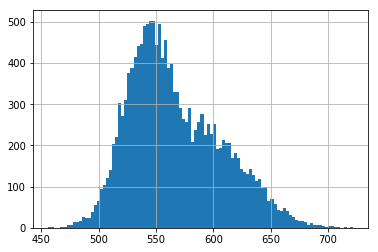

In [28]:
enem_df['MÉDIA ESCOLA'].hist(bins=100)  # try "bins"

## Selections / Filters

In [29]:
enem_df['DEPENDÊNCIA ADMINISTRATIVA']

0         Privada
1         Privada
2         Privada
3         Privada
4         Privada
5        Estadual
6        Estadual
7         Privada
8        Estadual
9        Estadual
10       Estadual
11       Estadual
12       Estadual
13       Estadual
14        Privada
15       Estadual
16       Estadual
17       Estadual
18       Estadual
19       Estadual
20       Estadual
21       Estadual
22       Estadual
23       Estadual
24       Estadual
25       Estadual
26       Estadual
27       Estadual
28       Estadual
29       Estadual
           ...   
15568     Privada
15569    Estadual
15570    Estadual
15571     Privada
15572     Privada
15573     Privada
15574     Privada
15575    Estadual
15576     Privada
15577     Privada
15578     Privada
15579     Privada
15580     Privada
15581     Privada
15582     Privada
15583    Estadual
15584    Estadual
15585     Privada
15586     Privada
15587     Privada
15588     Privada
15589     Privada
15590    Estadual
15591    Estadual
15592     

In [30]:
enem_df['DEPENDÊNCIA ADMINISTRATIVA'] == 'Privada'

0         True
1         True
2         True
3         True
4         True
5        False
6        False
7         True
8        False
9        False
10       False
11       False
12       False
13       False
14        True
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
15568     True
15569    False
15570    False
15571     True
15572     True
15573     True
15574     True
15575    False
15576     True
15577     True
15578     True
15579     True
15580     True
15581     True
15582     True
15583    False
15584    False
15585     True
15586     True
15587     True
15588     True
15589     True
15590    False
15591    False
15592     True
15593     True
15594    False
15595    False
15596    False
15597     True
Name: DEPENDÊNCIA ADMINISTRATIVA, Length: 15598, dtype: bool

In [31]:
is_private = enem_df['DEPENDÊNCIA ADMINISTRATIVA'] == 'Privada'  # 'True' for private schools
in_CE = enem_df['SIGLA DA UF'] == 'CE'  # 'True' for schools in CE
enem_df[is_private & in_CE]

,CÓDIGO DA ENTIDADE,NOME DA ENTIDADE,SIGLA DA UF,NOME MUNICÍPIO,DEPENDÊNCIA ADMINISTRATIVA,LOCALIZACAO,NÚMERO DE ALUNOS NO CENSO,PORTE DA ESCOLA,NÚMERO DE PARTICIPANTES NO ENEM POR ESCOLA,TAXA DE PARTICIPAÇÃO,...,TAXA DE APROVAÇÃO,TAXA DE REPROVAÇÃO,TAXA DE ABANDONO,MÉDIA DOS 30 MELHORES ALUNOS DA ESCOLA,MÉDIA ESCOLA,Percentual alunos NÍVEL 1,Percentual alunos NÍVEL 2,Percentual alunos NÍVEL 3,Percentual alunos NÍVEL 4,Percentual alunos NÍVEL 5
1660,23000872,VIRGEM PODEROSA ESC,CE,Acaraú,Privada,Urbana,32,De 31 a 60 alunos,29,90.625000,...,96.1,1.9,2.0,NaN,566.965515,13.793103,17.241379,55.172413,13.793103,0.000000
1662,23001895,IMACULADA CONCEICAO INSTITUTO,CE,Bela Cruz,Privada,Urbana,18,De 1 a 30 alunos,16,88.888893,...,97.9,2.1,0.0,NaN,592.918762,0.000000,31.250000,50.000000,18.750000,0.000000
1668,23005017,CENTRO DE EDUCACAO BASICA JOSE INACIO,CE,Granja,Privada,Urbana,14,De 1 a 30 alunos,13,92.857140,...,100.0,0.0,0.0,NaN,594.092285,0.000000,23.076923,53.846157,23.076923,0.000000
1673,23007486,CENTRO EDUCACIONAL CENECISTA SAO MANUEL,CE,Marco,Privada,Urbana,34,De 31 a 60 alunos,24,70.588234,...,99.1,0.9,0.0,NaN,546.916687,8.333334,50.000000,33.333336,8.333334,0.000000
1678,23009594,BENJAMIN SOARES INSTITUTO,CE,Guaraciaba do Norte,Privada,Urbana,29,De 1 a 30 alunos,26,89.655174,...,97.6,2.4,0.0,NaN,570.496155,3.846154,26.923079,57.692307,11.538462,0.000000
1681,23010673,ESCOLA PROFISSIONAL MONSENHOR MELO,CE,Ibiapina,Privada,Urbana,30,De 1 a 30 alunos,28,93.333336,...,100.0,0.0,0.0,NaN,587.096436,10.714286,10.714286,53.571426,25.000000,0.000000
1685,23011696,CENTRO EDUCACIONAL VIRGEM PODEROSA,CE,São Benedito,Privada,Urbana,11,De 1 a 30 alunos,11,100.000000,...,98.4,1.6,0.0,NaN,597.245483,0.000000,18.181818,54.545456,27.272728,0.000000
1691,23013761,PATRONATO TENENTE ANGELO DE SIQUEIRA PASSOS EEF,CE,Viçosa do Ceará,Privada,Urbana,15,De 1 a 30 alunos,12,80.000000,...,98.3,1.7,0.0,NaN,595.016663,0.000000,25.000000,50.000000,25.000000,0.000000
1705,23021152,CENTRO EDUCACIONAL CENECISTA MASSAPEENSE,CE,Massapê,Privada,Urbana,24,De 1 a 30 alunos,18,75.000000,...,100.0,0.0,0.0,NaN,573.849976,0.000000,22.222223,72.222221,5.555556,0.000000
1713,23024585,SANTO ANTONIO CENTRO DE EDUCACAO,CE,Sobral,Privada,Urbana,22,De 1 a 30 alunos,17,77.272728,...,92.8,5.8,1.4,NaN,557.099976,17.647058,17.647058,52.941177,11.764706,0.000000


You can query based on partial matches

In [32]:
enem_df['NOME DA ENTIDADE'].str.contains('NOSSA SENHORA')

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
15568    False
15569    False
15570    False
15571    False
15572    False
15573    False
15574    False
15575    False
15576    False
15577    False
15578    False
15579    False
15580    False
15581    False
15582    False
15583    False
15584    False
15585    False
15586    False
15587    False
15588    False
15589    False
15590    False
15591    False
15592    False
15593    False
15594    False
15595    False
15596    False
15597    False
Name: NOME DA ENTIDADE, Length: 15598, dtype: bool

You can impose a filter and then select only the columns that you want to see.

In [33]:
name_filter = enem_df['NOME DA ENTIDADE'].str.contains('NOSSA SENHORA')
enem_df[name_filter][['NOME DA ENTIDADE', 'MÉDIA ESCOLA', 'SIGLA DA UF']]

,NOME DA ENTIDADE,MÉDIA ESCOLA,SIGLA DA UF
228,ESCOLA ESTADUAL NOSSA SENHORA DO PERPETUO SOCORRO,515.818115,AM
235,ESCOLA ESTADUAL NOSSA SENHORA DE NAZARE,514.584473,AM
294,ESCOLA ESTADUAL NOSSA SENHORA APARECIDA,525.207886,AM
317,COLEGIO NOSSA SENHORA DO CARMO,548.273193,AM
341,COLEGIO NOSSA SENHORA DO ROSARIO,618.458313,AM
431,EEEFM NOSSA SENHORA APARECIDA,528.549988,PA
465,COLEGIO MARISTA NOSSA SENHORA DE NAZARE,652.287903,PA
467,COLEGIO SALESIANO NOSSA SENHORA DO CARMO,601.158325,PA
539,INSTITUTO NOSSA SENHORA AUXILIADORA,578.701599,PA
843,COLEGIO NOSSA SENHORA DA CONCEICAO,505.708099,TO


## Chaining Commands
***Question***: What are the five states with the highest average score? What are their abandon rate?

In [40]:
enem_df.groupby('SIGLA DA UF').mean()[['MÉDIA ESCOLA', 'TAXA DE ABANDONO']].sort_values('MÉDIA ESCOLA', ascending=False).head(5)


,MÉDIA ESCOLA,TAXA DE ABANDONO
SIGLA DA UF,,
DF,581.789785,2.264706
SP,580.943350,0.989546
RJ,578.954951,1.809019
PR,578.502434,3.380709
MG,575.391745,4.278313


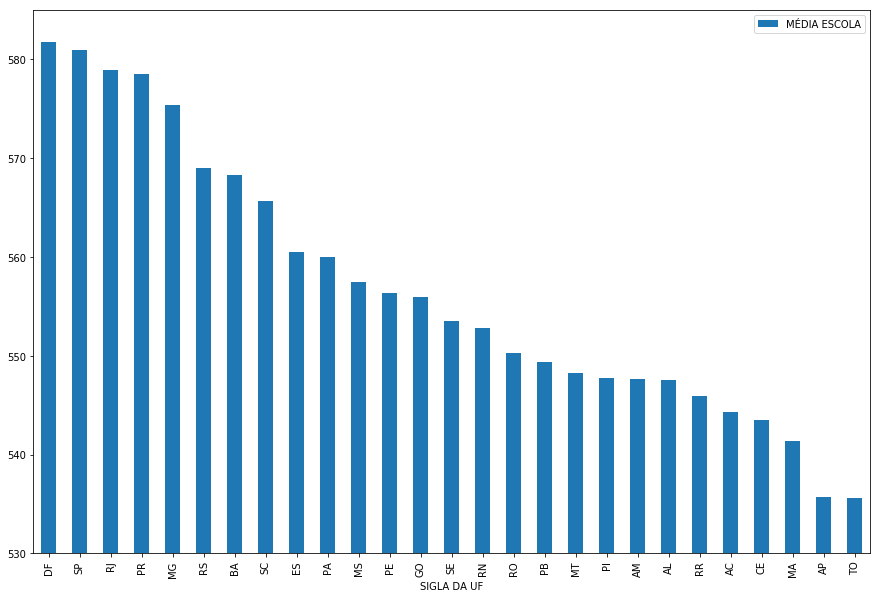

In [45]:
df_result = enem_df.groupby('SIGLA DA UF').mean()[['MÉDIA ESCOLA']].sort_values('MÉDIA ESCOLA', ascending=False)
df_result.plot(figsize=(15,10), kind='bar', ylim=[530, 585])  # kind='bar', figsize=(15,6), ylim=[530, 585]


## Coutning with Crosstabs

In [ ]:
pd.crosstab(enem_df['LOCALIZACAO'], enem_df['DEPENDÊNCIA ADMINISTRATIVA'])

In [ ]:
pd.crosstab(enem_df['LOCALIZACAO'], enem_df['DEPENDÊNCIA ADMINISTRATIVA'], margins=True)

In [ ]:
pd.crosstab(enem_df['LOCALIZACAO'], enem_df['DEPENDÊNCIA ADMINISTRATIVA'], margins=True, normalize='all')

## Pivot Tables
This functionality works exactly as the pivot table from MS Excel or MS Access.

In [46]:
pd.pivot_table(enem_df, values='MÉDIA ESCOLA', index='DEPENDÊNCIA ADMINISTRATIVA', columns='LOCALIZACAO', aggfunc=np.mean)


LOCALIZACAO,Rural,Urbana
DEPENDÊNCIA ADMINISTRATIVA,,
Estadual,532.792549,542.444808
Federal,586.207176,610.964768
Municipal,542.821089,567.124659
Privada,562.328246,599.684193


you can use multiple variables on the index.

In [47]:
pd.pivot_table(enem_df, values='MÉDIA ESCOLA', index=['DEPENDÊNCIA ADMINISTRATIVA', 'LOCALIZACAO'], columns='SIGLA DA UF', aggfunc=np.mean)


SIGLA DA UF                                     AC          AL          AM  \
DEPENDÊNCIA ADMINISTRATIVA LOCALIZACAO                                       
Estadual                   Rural        520.129300  523.582676  512.592056   
                           Urbana       528.501683  519.231654  526.388384   
Federal                    Rural               NaN         NaN         NaN   
                           Urbana       573.785339  581.340369  575.787518   
Municipal                  Rural               NaN         NaN         NaN   
                           Urbana              NaN         NaN         NaN   
Privada                    Rural               NaN         NaN  566.671570   
                           Urbana       597.886569  564.427489  596.130045   

SIGLA DA UF                                     AP          BA          CE  \
DEPENDÊNCIA ADMINISTRATIVA LOCALIZACAO                                       
Estadual                   Rural        515.926651  525.806266  507.930531   
                           Urbana       522.480068  537.090023  525.098222   
Federal                    Rural               NaN  597.007660  561.570496   
                           Urbana       588.540710  602.308037  602.126241   
Municipal                  Rural               NaN  526.604202         NaN   
                           Urbana              NaN  530.069839         NaN   
Privada                    Rural               NaN  553.395081  572.035278   
                           Urbana       582.782443  600.830483  590.783997   

SIGLA DA UF                                     DF          ES          GO  \
DEPENDÊNCIA ADMINISTRATIVA LOCALIZACAO                                       
Estadual                   Rural        543.787048  531.290038  519.145277   
                           Urbana       552.489709  540.255695  533.370924   
Federal                    Rural        558.597473  607.191569  586.175323   
                           Urbana       634.505859  624.629344  617.771479   
Municipal                  Rural               NaN         NaN         NaN   
                           Urbana              NaN         NaN  578.044403   
Privada                    Rural        559.124023  536.731247  552.036514   
                           Urbana       605.874754  607.202893  593.403552   

SIGLA DA UF                                     MA     ...              PR  \
DEPENDÊNCIA ADMINISTRATIVA LOCALIZACAO                 ...                   
Estadual                   Rural        510.256012     ...      550.645532   
                           Urbana       521.865679     ...      557.360858   
Federal                    Rural        569.754126     ...             NaN   
                           Urbana       590.330225     ...      623.760735   
Municipal                  Rural               NaN     ...             NaN   
                           Urbana       562.584595     ...             NaN   
Privada                    Rural        553.849426     ...      577.761129   
                           Urbana       571.168155     ...      601.823730   

SIGLA DA UF                                     RJ          RN          RO  \
DEPENDÊNCIA ADMINISTRATIVA LOCALIZACAO                                       
Estadual                   Rural        550.661081  506.978966  526.591256   
                           Urbana       547.809751  527.284401  540.312786   
Federal                    Rural        652.201660  599.847382  586.055664   
                           Urbana       639.494857  608.410743  595.089874   
Municipal                  Rural               NaN         NaN         NaN   
                           Urbana       577.517807         NaN         NaN   
Privada                    Rural        587.586975         NaN  542.424998   
                           Urbana       602.420906  582.869260  587.272841   

SIGLA DA UF                                     RR          RS          SC  \
DEPENDÊNCIA ADMIN

Notice that the output above is itself a `DataFrame` with a 2-column index. This is a multi-index `DataFrame` (which is basically a panel).

---
# Practical Example - Fecth Data from the Brazilian Central Bank (BCB)
If you find a good source of data and they happen to have a **data API**, it is very easy to build a function that fetches the data. In this example, we will make a wrapper for the [data API of the Time Series Management System](https://dadosabertos.bcb.gov.br/dataset/20542-saldo-da-carteira-de-credito-com-recursos-livres---total/resource/6e2b0c97-afab-4790-b8aa-b9542923cf88) ([Sistema de Gerenciamento de Séries](https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries), SGS) of the brazilian central bank.

The data is available in **JSON format** (google it!). The idea is to build a function that receives the Series ID and returns a DataFrame with the series.

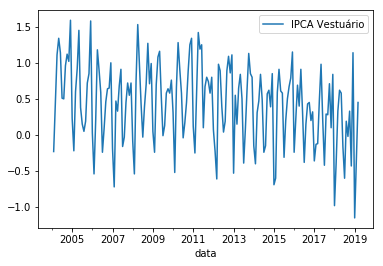

In [57]:
df = pd.read_json('https://api.bcb.gov.br/dados/serie/bcdata.sgs.1638/dados?formato=json')
df.index = pd.to_datetime(df['data'], dayfirst=True)
df = df.drop('data', axis=1)
df.columns = ['IPCA Vestuário']
df[df.index > '2004-01-01'].plot()

In [ ]:
df = pd.read_json('https://api.bcb.gov.br/dados/serie/bcdata.sgs.1638/dados?formato=json')
df = df.set_index(pd.to_datetime(df['data'], dayfirst=True)).drop('data', axis='columns')
df.columns = ['IPCA - Clothing']
df

In [58]:
def get_SGS_data(series_id, series_name):
    url = f'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{series_id}/dados?formato=json'
    df = pd.read_json(url)
    df = df.set_index(pd.to_datetime(df['data'], dayfirst=True)).drop('data', axis='columns')
    df.columns = [series_name]
    return df

You could make this function a bit more fancy by adding date filters, allowing to fecth several series at the same time (maybe by passing a list of series IDs). It would be perfect if you turned that into a python library so that everyone can use.

To test our function, let's look at the IBC-Br with seasonal adjustment (Mohtly proxy for the brazilian GDP). Its series ID is 24364.

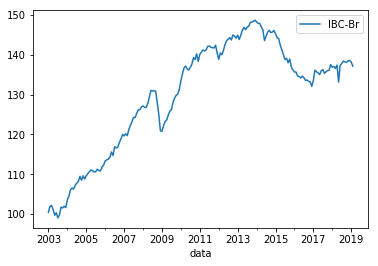

In [60]:
df_IBCbr = get_SGS_data(24364, 'IBC-Br')
df_IBCbr.plot()

In [ ]:
df_ipca = get_SGS_data(1638, 'IPCA - Clothing')
df_ipca = df_ipca[df_ipca.index > '2004-01-01']
df_ipca.plot()

In [ ]:
df_ipca = ((1+df_ipca/100).rolling(12, min_periods=12).apply(np.prod, raw=True) - 1)*100
df_ipca.plot()

# Pratical Example - Fetch Data from the FRED
We can repeat the exercise but using the data API from the [FRED](https://fred.stlouisfed.org/). Their data API URL requires a bit more work to get a clean result, but thanks to python, its possible to do it in just a few lines. To fully understand the code below you will need to understand a bit more about regular expressions.

In [62]:
def getFRED(ticker, series_name):
    df = pd.read_csv('https://fred.stlouisfed.org/data/' + ticker + '.txt', sep='\n')  # read data from website
    series_start = df[df[df.columns[0]].str.contains('DATE\s+VALUE')].index[0] + 1  # find the line where the series starts using regular expressions
    df = df.loc[series_start:]  # drop header description
    df = df[df.columns[0]].str.split('\s+', expand=True)  # split strings between date and value
    df = pd.DataFrame(data=df[1].values.astype(float), index=pd.to_datetime(df[0]), columns=[series_name])  # clean data
    df.index.rename('Date', inplace=True)
    return df

To test our scrapper, let's look at the american core CPI.

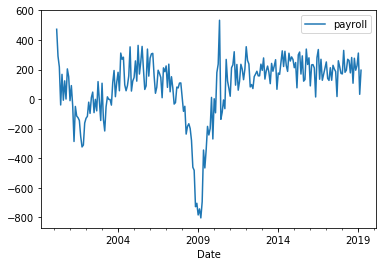

In [63]:
df = getFRED('PAYEMS', 'payroll')  # CPILFESL  PAYEMS
df[df.index > pd.to_datetime('2000-01-01')].diff(1).plot()

# Resampling VS Rolling
There is a difference between a moving average of the last 3 months and a series of quarterly frequency.

In [68]:
df = df.diff(1)[df.index > '2004-01-01']

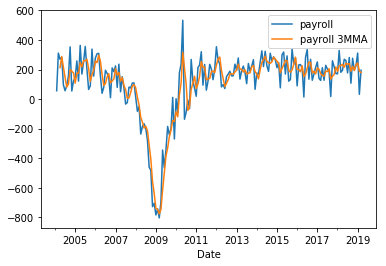

In [80]:
df['payroll 3MMA'] = df['payroll'].rolling(3).mean()
df.plot()

In [83]:
df.resample('Q').mean()

,payroll,payroll 3MMA
Date,,
2004-03-31,369.0,0.000000
2004-06-30,651.0,718.666667
2004-09-30,305.0,329.333333
2004-12-31,532.0,566.666667
2005-03-31,528.0,460.666667
2005-06-30,785.0,728.666667
2005-09-30,626.0,738.333333
2005-12-31,585.0,479.666667
2006-03-31,895.0,803.000000


In [ ]:
df['payroll change'] = df['payroll'].diff(1)
df['payroll change 3m MA'] = df['payroll change'].rolling(3).mean()
df = df[df.index > pd.to_datetime('2000-01-01')]

In [ ]:
df[['payroll change', 'payroll change 3m MA']].plot(figsize=(15, 8))

The `.resample()` method is different from the `.rolling()` because it changes the frequency of the series. All the resampling aliases are available [here](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)

In [ ]:
df['payroll change'].resample('Q').mean()

# Working with financial data

In [84]:
df_stocks = pd.read_excel('data/stocks_portfolio.xlsx', sheet_name='Values', index_col='Dates')
df_stocks.dropna(how='all')
df_stocks

,BBDC4,PETR4,ABEV3,VALE3,ITUB4,SUZB3,LREN3,UGPA3,FIBR3,GGBR4,...,LAME4,TIMP3,CCRO3,BRAP4,MGLU3,BRML3,MULT3,CVCB3,CSNA3,IBOV
Dates,,,,,,,,,,,,,,,,,,,,,
2010-01-01,17.042,36.69,6.973,49.50,26.426,NaN,7.145,20.028,39.09,29.14,...,7.946,7.15,9.973,38.53,NaN,7.191,10.762,NaN,28.000,68588.41
2010-01-04,17.661,37.32,7.097,51.49,27.402,NaN,7.318,20.375,39.30,29.60,...,8.059,7.18,10.025,39.20,NaN,7.224,11.177,NaN,28.105,70045.08
2010-01-05,17.567,37.00,7.067,51.97,27.580,NaN,7.055,20.600,40.80,30.10,...,7.777,7.70,10.163,39.99,NaN,7.358,11.127,NaN,28.365,70239.82
2010-01-06,17.427,37.50,7.098,53.07,27.341,NaN,6.918,20.950,40.71,30.30,...,7.629,7.60,10.500,40.55,NaN,7.692,11.276,NaN,28.400,70729.34
2010-01-07,17.380,37.15,7.077,53.29,27.061,NaN,6.855,20.808,40.38,29.62,...,7.624,7.43,10.403,41.00,NaN,7.592,11.226,NaN,28.100,70451.12
2010-01-08,17.361,36.95,7.093,53.81,26.651,NaN,6.891,20.725,39.50,29.54,...,7.649,7.35,10.400,41.60,NaN,7.525,10.729,NaN,28.735,70262.70
2010-01-11,17.375,36.83,7.063,53.65,26.419,NaN,7.018,21.100,39.65,29.56,...,7.675,7.52,10.500,41.78,NaN,7.395,10.517,NaN,29.300,70433.49
2010-01-12,17.427,36.36,7.153,53.50,26.173,NaN,7.182,21.000,38.23,29.35,...,7.793,7.42,10.500,41.79,NaN,7.318,10.497,NaN,28.755,70075.78
2010-01-13,17.520,36.30,7.268,54.16,26.255,NaN,7.264,20.900,37.50,29.49,...,7.874,7.44,10.350,42.16,NaN,7.308,10.381,NaN,29.250,70385.47


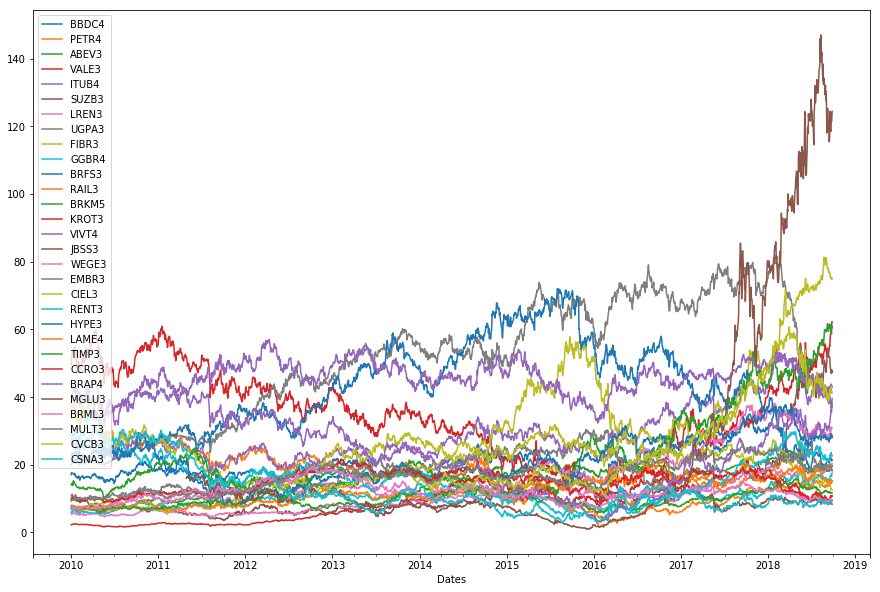

In [85]:
df_stocks[df_stocks.columns[:-1]].plot(figsize=(15,10))

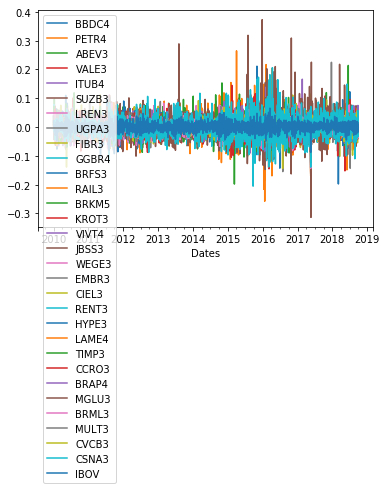

In [86]:
df_stocks.pct_change(1).plot()

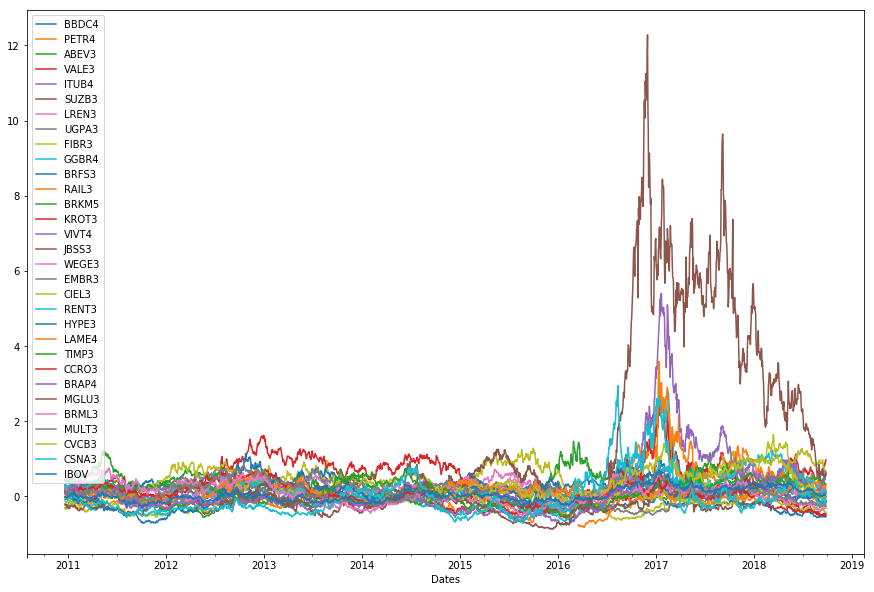

In [87]:
df_returns = df_stocks.pct_change(1)

df_returns_1y = df_stocks.pct_change(252)

df_returns_1y.plot(figsize=(15, 10))

In [92]:
df_vols_1y = df_returns.rolling(252).aggregate(np.std)*np.sqrt(252)
#df_vols_1y.plot(figsize=(15, 10))
df_vols_1y

,BBDC4,PETR4,ABEV3,VALE3,ITUB4,SUZB3,LREN3,UGPA3,FIBR3,GGBR4,...,LAME4,TIMP3,CCRO3,BRAP4,MGLU3,BRML3,MULT3,CVCB3,CSNA3,IBOV
Dates,,,,,,,,,,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


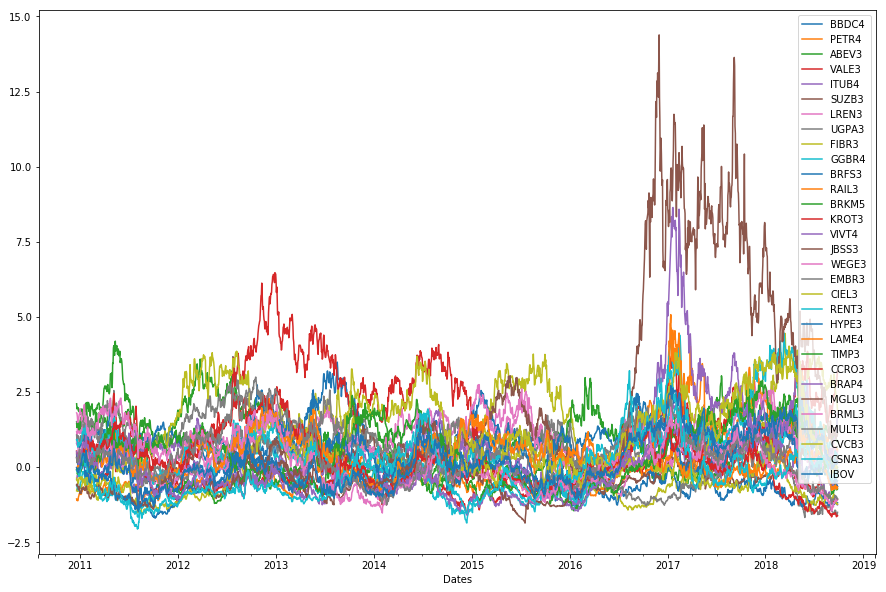

In [89]:
df_sharpe = df_returns_1y/df_vols_1y
df_sharpe.plot(figsize=(15,10))

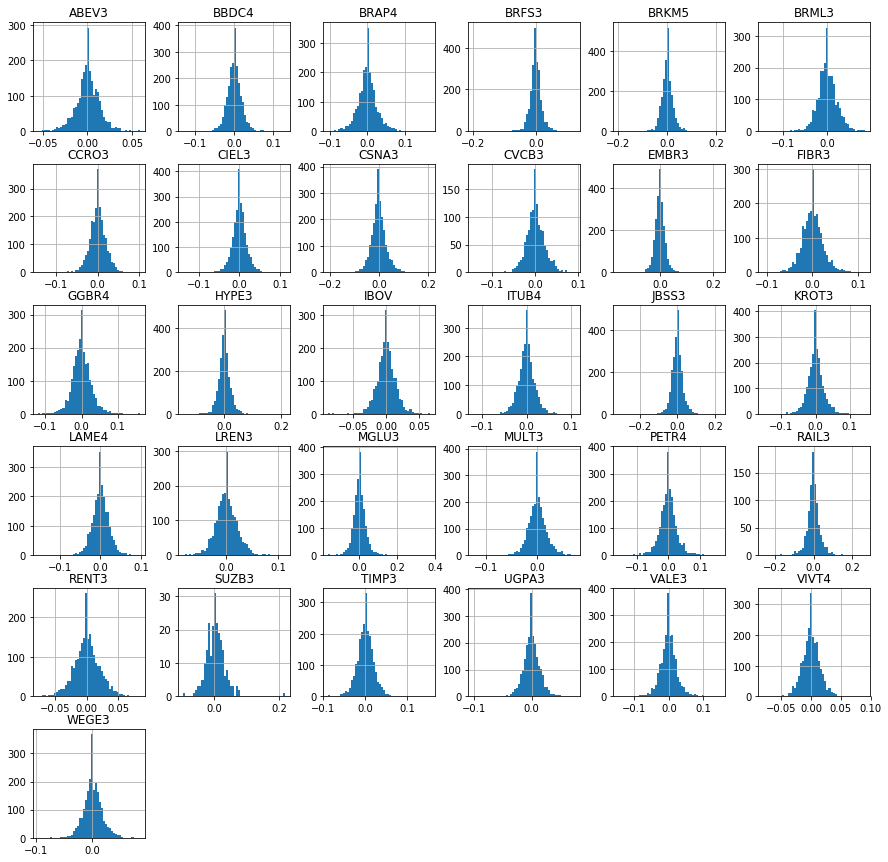

In [93]:
df_returns.hist(figsize=(15,15), bins=50)
plt.show()

In [94]:
df_returns.corr()

,BBDC4,PETR4,ABEV3,VALE3,ITUB4,SUZB3,LREN3,UGPA3,FIBR3,GGBR4,...,LAME4,TIMP3,CCRO3,BRAP4,MGLU3,BRML3,MULT3,CVCB3,CSNA3,IBOV
BBDC4,1.000000,0.596519,0.416845,0.398530,0.877180,-0.097144,0.488850,0.462544,0.106586,0.463823,...,0.511092,0.359438,0.456301,0.434956,0.279988,0.517637,0.487603,0.396006,0.460293,0.818080
PETR4,0.596519,1.000000,0.286571,0.463537,0.576642,-0.053157,0.368848,0.393459,0.045421,0.457187,...,0.392674,0.305107,0.405147,0.476075,0.242619,0.440156,0.382678,0.351588,0.503173,0.758040
ABEV3,0.416845,0.286571,1.000000,0.284049,0.404876,-0.036348,0.351391,0.344785,0.154472,0.283658,...,0.359617,0.262107,0.325068,0.295311,0.188451,0.330710,0.313656,0.225883,0.281275,0.497222
VALE3,0.398530,0.463537,0.284049,1.000000,0.387594,0.140473,0.281578,0.259511,0.261244,0.605416,...,0.292142,0.302791,0.225540,0.895469,0.222972,0.272504,0.231674,0.176132,0.618407,0.613469
ITUB4,0.877180,0.576642,0.404876,0.387594,1.000000,-0.152100,0.485272,0.455035,0.121726,0.454776,...,0.510259,0.367027,0.449205,0.417699,0.263711,0.503711,0.489211,0.388607,0.452430,0.821247
SUZB3,-0.097144,-0.053157,-0.036348,0.140473,-0.152100,1.000000,-0.118538,-0.029399,0.291126,0.018133,...,-0.068382,-0.062032,-0.020469,0.075416,0.014589,-0.102889,-0.062631,-0.116694,0.024528,-0.019721
LREN3,0.488850,0.368848,0.351391,0.281578,0.485272,-0.118538,1.000000,0.376704,0.108051,0.318214,...,0.593528,0.300935,0.380239,0.312849,0.265726,0.438223,0.420550,0.320304,0.324579,0.614535
UGPA3,0.462544,0.393459,0.344785,0.259511,0.455035,-0.029399,0.376704,1.000000,0.111010,0.287713,...,0.360081,0.284315,0.372479,0.284713,0.169977,0.376350,0.351690,0.307545,0.304906,0.546170
FIBR3,0.106586,0.045421,0.154472,0.261244,0.121726,0.291126,0.108051,0.111010,1.000000,0.231063,...,0.116919,0.167003,0.000132,0.234064,0.050037,0.026290,0.011577,-0.109371,0.177081,0.245727
GGBR4,0.463823,0.457187,0.283658,0.605416,0.454776,0.018133,0.318214,0.287713,0.231063,1.000000,...,0.353762,0.298535,0.283883,0.616329,0.246294,0.305839,0.285251,0.238545,0.677944,0.629307


In [95]:
df_3stocks = df_stocks[['IBOV', 'PETR4', 'BBDC4']]

df_3stocks

,IBOV,PETR4,BBDC4
Dates,,,
2010-01-01,68588.41,36.69,17.042
2010-01-04,70045.08,37.32,17.661
2010-01-05,70239.82,37.00,17.567
2010-01-06,70729.34,37.50,17.427
2010-01-07,70451.12,37.15,17.380
2010-01-08,70262.70,36.95,17.361
2010-01-11,70433.49,36.83,17.375
2010-01-12,70075.78,36.36,17.427
2010-01-13,70385.47,36.30,17.520


In [96]:
df_3stocks.pct_change(1).corr()

,IBOV,PETR4,BBDC4
IBOV,1.00000,0.758040,0.818080
PETR4,0.75804,1.000000,0.596519
BBDC4,0.81808,0.596519,1.000000


In [98]:
df_corr = df_3stocks.pct_change(1).rolling(63).corr().dropna()
df_corr

IBOV     PETR4     BBDC4
Dates                                         
2010-03-31 IBOV   1.000000  0.794201  0.806916
           PETR4  0.794201  1.000000  0.572554
           BBDC4  0.806916  0.572554  1.000000
2010-04-01 IBOV   1.000000  0.790915  0.800055
           PETR4  0.790915  1.000000  0.563953
           BBDC4  0.800055  0.563953  1.000000
2010-04-02 IBOV   1.000000  0.795052  0.802464
           PETR4  0.795052  1.000000  0.562664
           BBDC4  0.802464  0.562664  1.000000
2010-04-05 IBOV   1.000000  0.793628  0.811753
           PETR4  0.793628  1.000000  0.575812
           BBDC4  0.811753  0.575812  1.000000
2010-04-06 IBOV   1.000000  0.792121  0.809461
           PETR4  0.792121  1.000000  0.569371
           BBDC4  0.809461  0.569371  1.000000
2010-04-07 IBOV   1.000000  0.792440  0.807925
           PETR4  0.792440  1.000000  0.567397
           BBDC4  0.807925  0.567397  1.000000
2010-04-08 IBOV   1.000000  0.785787  0.807654
           PETR4  0.785787  1.000000  0.545593
           BBDC4  0.807654  0.545593  1.000000
2010-04-09 IBOV   1.000000  0.784620  0.810205
           PETR4  0.784620  1.000000  0.548561
           BBDC4  0.810205  0.548561  1.000000
2010-04-12 IBOV   1.000000  0.788550  0.812556
           PETR4  0.788550  1.000000  0.558640
           BBDC4  0.812556  0.558640  1.000000
2010-04-13 IBOV   1.000000  0.784813  0.808657
           PETR4  0.784813  1.000000  0.548030
           BBDC4  0.808657  0.548030  1.000000
...                    ...       ...       ...
2018-09-13 IBOV   1.000000  0.809573  0.931144
           PETR4  0.809573  1.000000  0.737861
           BBDC4  0.931144  0.737861  1.000000
2018-09-14 IBOV   1.000000  0.797247  0.928328
           PETR4  0.797247  1.000000  0.714315
           BBDC4  0.928328  0.714315  1.000000
2018-09-17 IBOV   1.000000  0.806370  0.930005
           PETR4  0.806370  1.000000  0.717424
           BBDC4  0.930005  0.717424  1.000000
2018-09-18 IBOV   1.000000  0.794088  0.915674
           PETR4  0.794088  1.000000  0.684898
           BBDC4  0.915674  0.684898  1.000000
2018-09-19 IBOV   1.000000  0.796560  0.914701
           PETR4  0.796560  1.000000  0.686657
           BBDC4  0.914701  0.686657  1.000000
2018-09-20 IBOV   1.000000  0.805093  0.915876
           PETR4  0.805093  1.000000  0.702340
           BBDC4  0.915876  0.702340  1.000000
2018-09-21 IBOV   1.000000  0.802566  0.919199
           PETR4  0.802566  1.000000  0.711390
           BBDC4  0.919199  0.711390  1.000000
2018-09-24 IBOV   1.000000  0.831471  0.920802
           PETR4  0.831471  1.000000  0.738888
           BBDC4  0.920802  0.738888  1.000000
2018-09-25 IBOV   1.000000  0.838958  0.917564
           PETR4  0.838958  1.000000  0.754633
           BBDC4  0.917564  0.754633  1.000000
2018-09-26 IBOV   1.000000  0.836710  0.916549
           PETR4  0.836710  1.000000  0.751674
           BBDC4  0.916549  0.751674  1.000000

[6648 rows x 3 columns]

In [99]:
df = df_corr[df_corr.index.get_level_values(1) == 'PETR4']['BBDC4']
df

Dates            
2010-03-31  PETR4    0.572554
2010-04-01  PETR4    0.563953
2010-04-02  PETR4    0.562664
2010-04-05  PETR4    0.575812
2010-04-06  PETR4    0.569371
2010-04-07  PETR4    0.567397
2010-04-08  PETR4    0.545593
2010-04-09  PETR4    0.548561
2010-04-12  PETR4    0.558640
2010-04-13  PETR4    0.548030
2010-04-14  PETR4    0.556494
2010-04-15  PETR4    0.561653
2010-04-16  PETR4    0.578905
2010-04-19  PETR4    0.536470
2010-04-20  PETR4    0.505384
2010-04-21  PETR4    0.508575
2010-04-22  PETR4    0.504840
2010-04-23  PETR4    0.524386
2010-04-26  PETR4    0.559885
2010-04-27  PETR4    0.563983
2010-04-28  PETR4    0.562802
2010-04-29  PETR4    0.578413
2010-04-30  PETR4    0.592715
2010-05-03  PETR4    0.577397
2010-05-04  PETR4    0.558337
2010-05-05  PETR4    0.529297
2010-05-06  PETR4    0.528301
2010-05-07  PETR4    0.513254
2010-05-10  PETR4    0.515175
2010-05-11  PETR4    0.519073
                       ...   
2018-08-16  PETR4    0.440521
2018-08-17  PETR4    0

In [100]:
df.index = df.index.droplevel(1)
df

Dates
2010-03-31    0.572554
2010-04-01    0.563953
2010-04-02    0.562664
2010-04-05    0.575812
2010-04-06    0.569371
2010-04-07    0.567397
2010-04-08    0.545593
2010-04-09    0.548561
2010-04-12    0.558640
2010-04-13    0.548030
2010-04-14    0.556494
2010-04-15    0.561653
2010-04-16    0.578905
2010-04-19    0.536470
2010-04-20    0.505384
2010-04-21    0.508575
2010-04-22    0.504840
2010-04-23    0.524386
2010-04-26    0.559885
2010-04-27    0.563983
2010-04-28    0.562802
2010-04-29    0.578413
2010-04-30    0.592715
2010-05-03    0.577397
2010-05-04    0.558337
2010-05-05    0.529297
2010-05-06    0.528301
2010-05-07    0.513254
2010-05-10    0.515175
2010-05-11    0.519073
                ...   
2018-08-16    0.440521
2018-08-17    0.454495
2018-08-20    0.442199
2018-08-21    0.489315
2018-08-22    0.495675
2018-08-23    0.456109
2018-08-24    0.502379
2018-08-27    0.506451
2018-08-28    0.507358
2018-08-29    0.698437
2018-08-30    0.730058
2018-08-31    0.713346
2018-

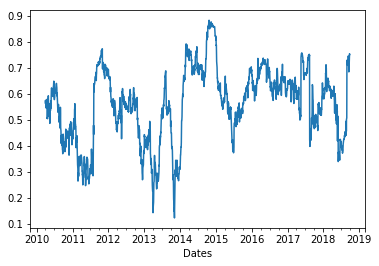

In [101]:
df.plot()

## Read Data From an SQL DataBase
IF you have no idea of what SQL is, Google it!

If you know what it is but do not know how to use it, there is a great [course from CodeCademy](https://www.codecademy.com/learn/learn-sql). It is a fast course, you can do everything in less than two hours.

The example below is just to show that pandas is capable of grabing data straight from a database, without the need of specific software. The `.sqlite` file simulates an SQL Database. Usually you would put the address of the Database server in its place.

In [102]:
import sqlite3
connection = sqlite3.connect('data/weather_2012.sqlite')
query = 'SELECT * FROM weather_2012 WHERE temp > 0 LIMIT 10'
DadosSQL = pd.read_sql(query, connection)
DadosSQL

,id,date_time,temp
0,14,2012-01-01 13:00:00,0.2
1,15,2012-01-01 14:00:00,0.8
2,16,2012-01-01 15:00:00,1.8
3,17,2012-01-01 16:00:00,2.6
4,18,2012-01-01 17:00:00,3.0
5,19,2012-01-01 18:00:00,3.8
6,20,2012-01-01 19:00:00,3.1
7,21,2012-01-01 20:00:00,3.2
8,22,2012-01-01 21:00:00,4.0
9,23,2012-01-01 22:00:00,4.4


---
# Handling Dates
Python has a native date and time variable type, which is called `datetime`. you can find the complete guide [here](https://docs.python.org/3/library/datetime.html).

In [2]:
import datetime as dt

In [5]:
var_dt = dt.datetime(year=2019, month=5, day=4)
var_dt

datetime.datetime(2019, 5, 4, 0, 0)

There are some useful methods in this class

In [9]:
var_td = dt.timedelta(days=10)
var_td

datetime.timedelta(10)

In [10]:
var_dt + var_td

datetime.datetime(2019, 5, 14, 0, 0)

Although this is a native python class that can handle dates very well, the most used class is the pandas date format, called `timestamp`

In [12]:
import pandas as pd
var_ts = pd.to_datetime('2019-05-04')
var_ts

Timestamp('2019-05-04 00:00:00')

In [13]:
var_ts.day

4

In [14]:
var_ts.month

5

In [15]:
var_ts.year

2019

In [16]:
var_ts.days_in_month

31

In [17]:
var_ts.dayofweek

5

In [18]:
var_ts.weekofyear

18

We can also transform a date to a string using the `strftime` method. The full reference for how to choose your date format is [here](http://strftime.org).

In [22]:
var_ts.strftime('%a')

'Sat'

In [23]:
var_ts.strftime('%A')

'Saturday'

In [30]:
var_ts.strftime('%b-%d/%Y')

'May-04/2019'

A very useful functionality from the pandas library is the time-series offsets, or `tseries.offsets`. The cells below show a few examples using the most commom offsets, but you can find the full guide [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects).

In [3]:
from pandas.tseries.offsets import BDay
var_today = pd.to_datetime('today')
var_today

Timestamp('2019-05-04 08:21:51.598683')

In [7]:
var_today + BDay(1)

Timestamp('2019-05-06 08:21:51.598683')

In [8]:
var_today + pd.Timedelta(days=1)

Timestamp('2019-05-05 08:21:51.598683')